                                                     Avocado Project

Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error

In [2]:
url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip?raw=true"
df = pd.read_csv(url, compression='zip')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
df.shape

(18249, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [8]:
df.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.sum()

Unnamed: 0                                                 442214
Date            2015-12-272015-12-202015-12-132015-12-062015-1...
AveragePrice                                              25657.7
Total Volume                                   15523402593.400002
4046                                                5347110739.26
4225                                                5386275717.93
4770                                                 416802342.13
Total Bags                                      4373175798.389999
Small Bags                                          3324870837.51
Large Bags                                           991615770.55
XLarge Bags                                           56689177.33
type            conventionalconventionalconventionalconvention...
year                                                     36792683
region          AlbanyAlbanyAlbanyAlbanyAlbanyAlbanyAlbanyAlba...
dtype: object

<Axes: >

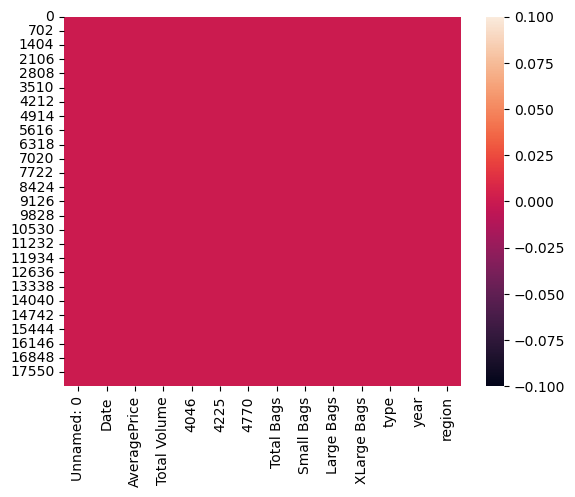

In [11]:
sns.heatmap(df.isnull())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [14]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [15]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df['region'] = label_encoder.fit_transform(df['region'])

df['Date'] = pd.to_datetime(df['Date'])

df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

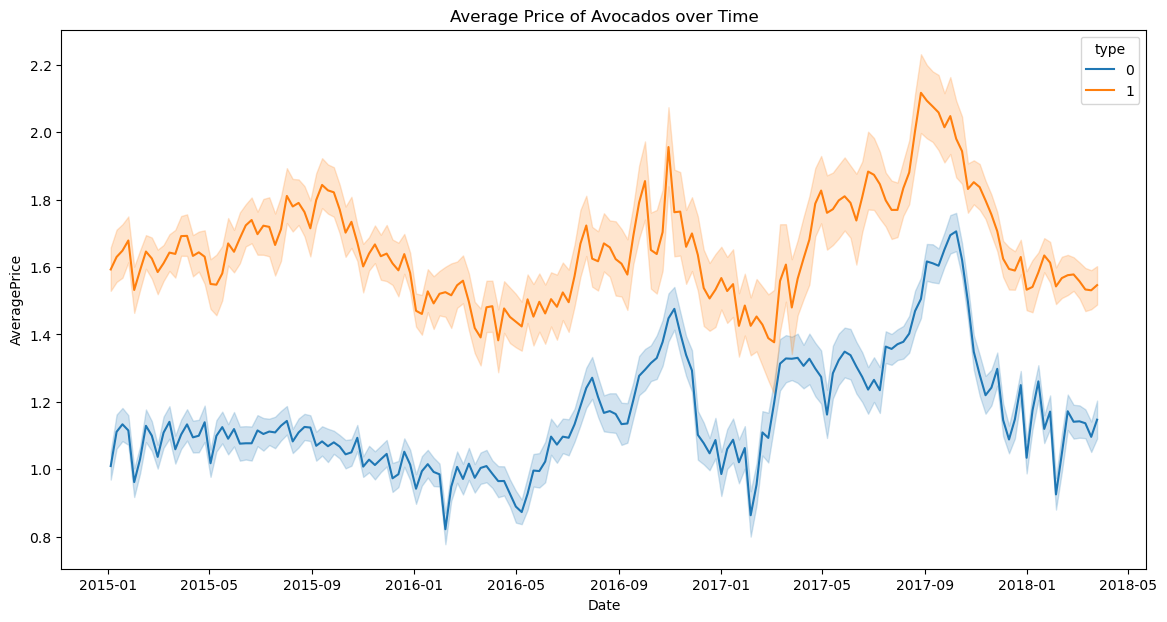

In [16]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='AveragePrice', hue='type')
plt.title('Average Price of Avocados over Time')
plt.show()

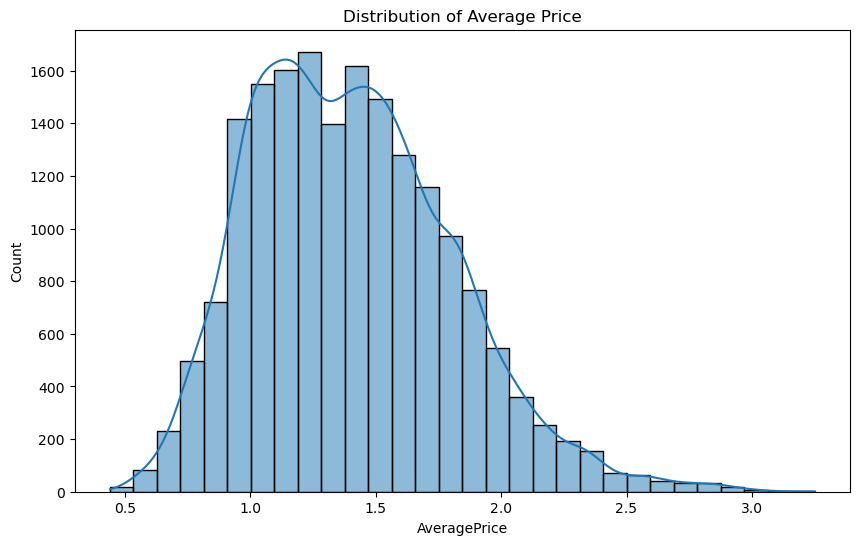

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AveragePrice'], bins=30, kde=True)
plt.title('Distribution of Average Price')
plt.show()

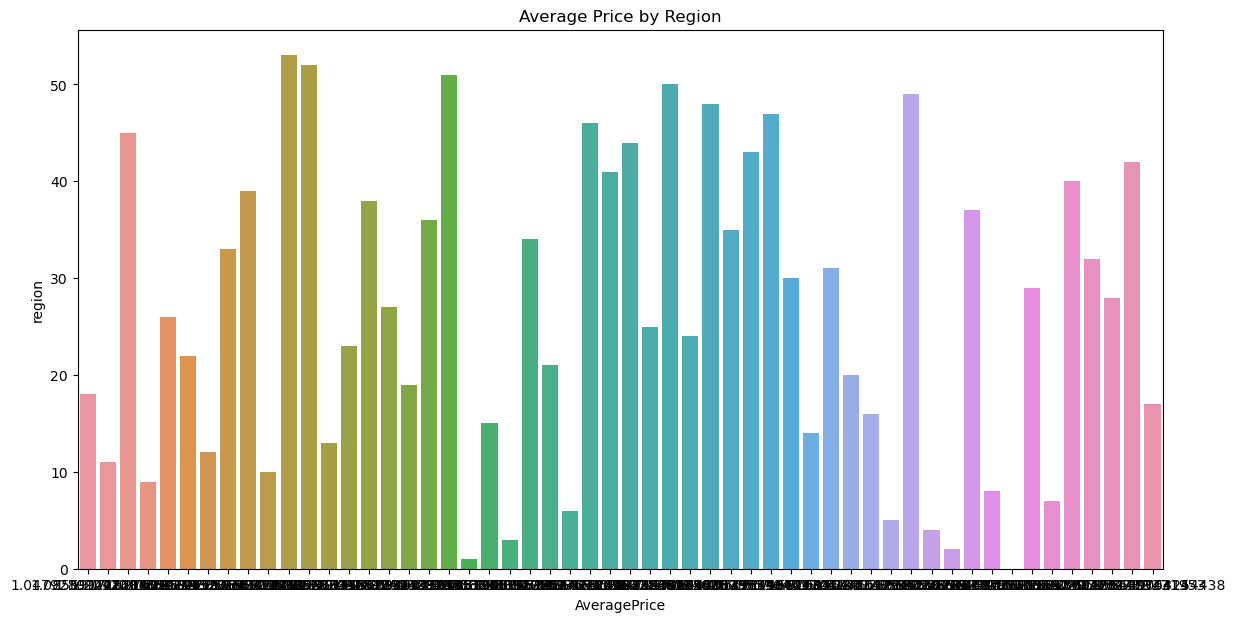

In [18]:
plt.figure(figsize=(14, 7))
avg_price_region = df.groupby('region')['AveragePrice'].mean().reset_index()
sns.barplot(data=avg_price_region, x='AveragePrice', y='region')
plt.title('Average Price by Region')
plt.show()


In [25]:
X_class = df.drop(columns=['Date', 'AveragePrice', 'type', 'year'])
y_class = df['type']


X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_class, y_train_class)


y_pred_class = clf.predict(X_test_class)
print(classification_report(y_test_class, y_pred_class))


X_reg = df.drop(columns=['Date', 'AveragePrice', 'year'])
y_reg = df['AveragePrice']


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)


y_pred_reg = reg.predict(X_test_reg)
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1820
           1       1.00      1.00      1.00      1830

    accuracy                           1.00      3650
   macro avg       1.00      1.00      1.00      3650
weighted avg       1.00      1.00      1.00      3650

Mean Squared Error: 0.023664367443835616
